In [85]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np


Load the MNIST dataset

In [86]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

Visualize the dataset

Target labels:  [1 8 0 0 9 9 7 5 1 8]


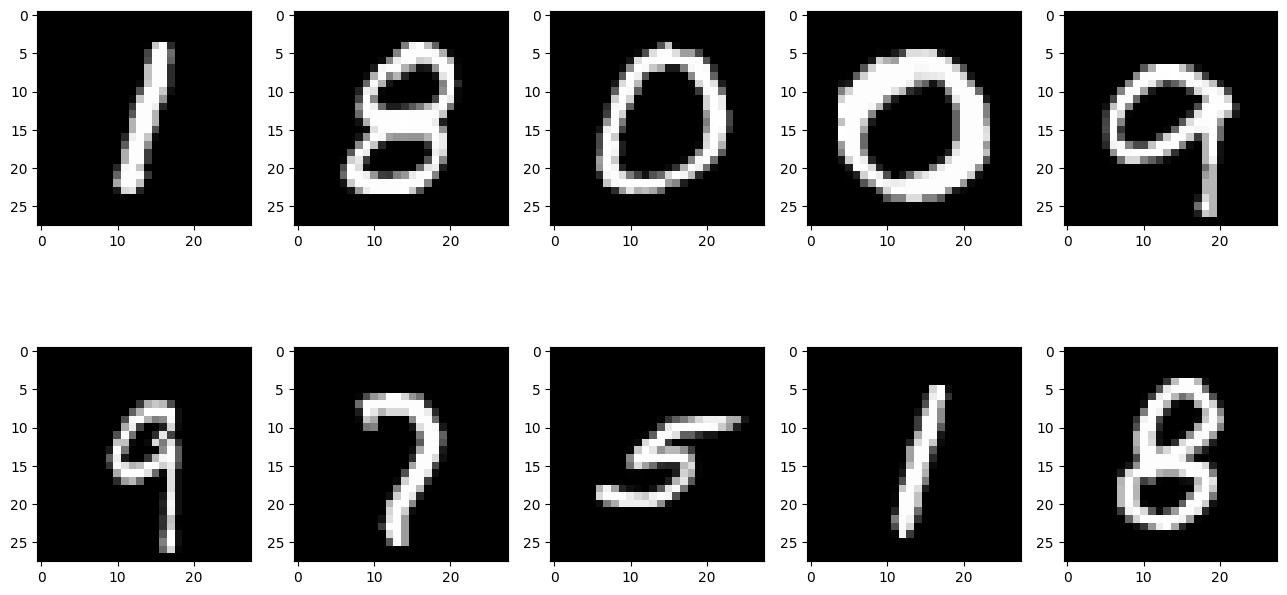

In [87]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [88]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [100]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-4)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l1(1e-5)))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

C:\Users\ASUS\miniconda3\envs\se4050\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,810 (221.91 KB)

 Trainable params: 56,810 (221.91 KB)

 Non-trainable params: 0 (0.00 B)

In [101]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,810 (221.91 KB)

 Trainable params: 56,810 (221.91 KB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [91]:
train_info = model.fit(new_train_data , new_train_target , epochs = 10, validation_split=0.1, verbose=2)

Epoch 1/10
1688/1688 - 6s - 4ms/step - accuracy: 0.9055 - loss: 0.3288 - val_accuracy: 0.9547 - val_loss: 0.1730
Epoch 2/10
1688/1688 - 5s - 3ms/step - accuracy: 0.9591 - loss: 0.1551 - val_accuracy: 0.9627 - val_loss: 0.1447
Epoch 3/10
1688/1688 - 4s - 3ms/step - accuracy: 0.9685 - loss: 0.1240 - val_accuracy: 0.9583 - val_loss: 0.1615
Epoch 4/10
1688/1688 - 5s - 3ms/step - accuracy: 0.9744 - loss: 0.1095 - val_accuracy: 0.9740 - val_loss: 0.1185
Epoch 5/10
1688/1688 - 4s - 3ms/step - accuracy: 0.9779 - loss: 0.0966 - val_accuracy: 0.9785 - val_loss: 0.1058
Epoch 6/10
1688/1688 - 4s - 3ms/step - accuracy: 0.9805 - loss: 0.0891 - val_accuracy: 0.9795 - val_loss: 0.1023
Epoch 7/10
1688/1688 - 5s - 3ms/step - accuracy: 0.9818 - loss: 0.0847 - val_accuracy: 0.9770 - val_loss: 0.1131
Epoch 8/10
1688/1688 - 5s - 3ms/step - accuracy: 0.9835 - loss: 0.0817 - val_accuracy: 0.9767 - val_loss: 0.1132
Epoch 9/10
1688/1688 - 5s - 3ms/step - accuracy: 0.9839 - loss: 0.0792 - val_accuracy: 0.9733 - 

Plot the loss and accuracy graphs

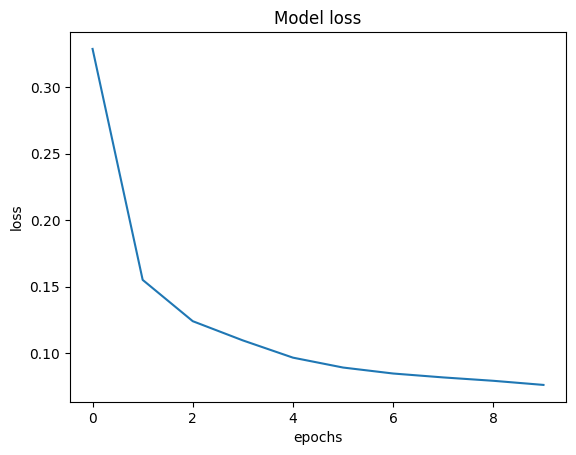

In [102]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

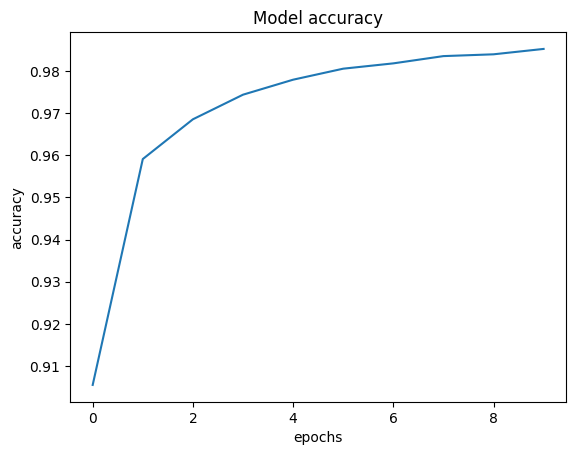

In [103]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [104]:
loss, acc = model.evaluate(new_test_data, new_test_target, verbose=0)
print(f'Loss (test): {loss:.4f}\nAccuracy (test): {acc:.4%}')

Loss (test): 2.3302
Accuracy (test): 11.6800%


Save the model weights

In [105]:
model.save_weights("MNIST_WEIGHTS_V1.weights.h5")

In [106]:
# Confusion matrix & per-class metrics
y_true = np.argmax(new_test_target, axis=1)
y_pred = np.argmax(model.predict(new_test_data), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


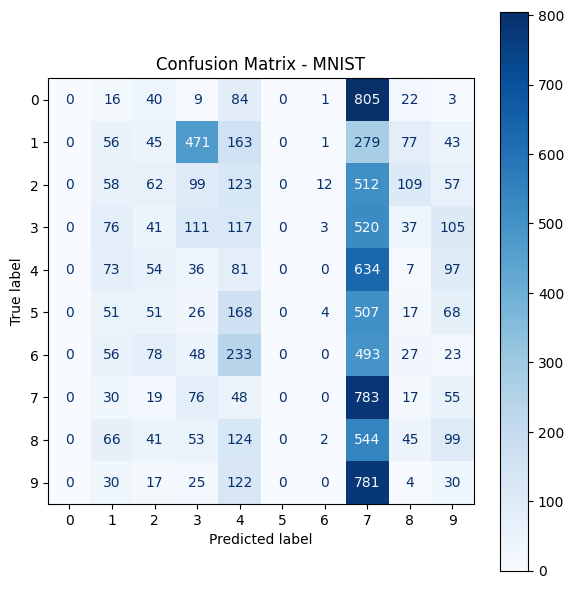

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000       980
           1     0.1094    0.0493    0.0680      1135
           2     0.1384    0.0601    0.0838      1032
           3     0.1164    0.1099    0.1130      1010
           4     0.0641    0.0825    0.0722       982
           5     0.0000    0.0000    0.0000       892
           6     0.0000    0.0000    0.0000       958
           7     0.1337    0.7617    0.2274      1028
           8     0.1243    0.0462    0.0674       974
           9     0.0517    0.0297    0.0378      1009

    accuracy                         0.1168     10000
   macro avg     0.0738    0.1139    0.0670     10000
weighted avg     0.0758    0.1168    0.0686     10000



C:\Users\ASUS\miniconda3\envs\se4050\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\ASUS\miniconda3\envs\se4050\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\ASUS\miniconda3\envs\se4050\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.sh

In [107]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(10)))
fig, ax = plt.subplots(figsize=(6,6))
disp.plot(ax=ax, cmap='Blues', values_format='d')
plt.title("Confusion Matrix - MNIST")
plt.tight_layout()
plt.show()
print(classification_report(y_true, y_pred, digits=4))